In [30]:
import sys
del sys.modules['etl']

In [31]:
import etl as etl

In [32]:
data = etl.data_analysis.data_read()

In [33]:
etl.data_analysis.stats_summary(data)

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


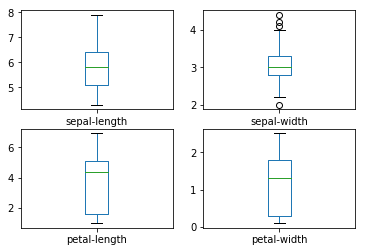

In [34]:
etl.data_analysis.univariate_plt(data, 'box')

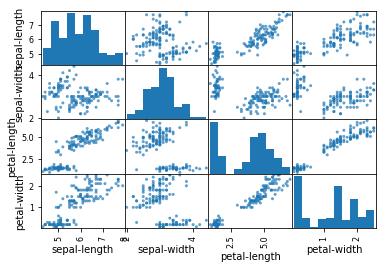

In [36]:
etl.data_analysis.multivariate_plt(data)

In [83]:
del sys.modules['algo']

In [84]:
import algo as algo

In [85]:
X_train_std, X_validation_std, Y_train, Y_validation = algo.algo.preprocessing(data)

C:\Users\AmirB\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [86]:
logreg = algo.algo.model_fit(X_train_std, Y_train)
logreg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [87]:
##print accuracy
algo.algo.model_accuracy(logreg, X_validation_std, Y_validation)

Accuracy of logistic regression classifier on test set: 0.90


In [88]:
algo.algo.confusion_matrix(Y_validation)

AttributeError: 'function' object has no attribute 'logreg'

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [69]:
##print confusion matrix to understand more
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_validation, Y_pred)
print(confusion_matrix)

[[ 7  0  0]
 [ 0 12  0]
 [ 0  3  8]]


#### https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

### Compute precision, recall, F-measure and support

In [70]:
from sklearn.metrics import classification_report
print(classification_report(Y_validation, Y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.80      1.00      0.89        12
 Iris-virginica       1.00      0.73      0.84        11

    avg / total       0.92      0.90      0.90        30



In [72]:
import etl as etl

In [74]:
etl.data_analysis.class_dist(data)

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [ ]:
##https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

In [1]:
import pandas as pd
import numpy as np

In [17]:
##nak customer information dataset 
data = pd.read_csv('https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv')

In [7]:
##target variable (y) to predict whether the client has subscribed a term deposit
##build scripts for each one of the below
##build etl - cleaning data
##build visualisations to see which feature will be good predictor - kaggle have good example
##over-sampling using SMOTE - to solve class inbalance problem
##feature selection - recusive elimination technique
##fitting model
##validating results

### Cleaning data and model fitting
#### Clean data by dropping na's and creating dummy variables so that machine learning models can read it
#### Fit model with class inbalance and compare performance with overampling using SMOTE

In [18]:
##etl

data = data.dropna()

##cleaning eduction feature - too many categories
##grouping all basics
data['education'] = np.where(data['education'].str.contains('basic'), 'Basic', data['education'])
data['education'].unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

In [20]:
#data exploring

##predictor is unbalanced towards no subscriptions
data['y'].value_counts()

count_no_sub = len(data[data['y']==0])
count_sub = len(data[data['y']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", round(pct_of_no_sub*100,0), '%')
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", round(pct_of_sub*100, 0), '%')

percentage of no subscription is 89.0 %
percentage of subscription 11.0 %


In [19]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [20]:
##visualising features to see what will be significant to the predictor
##required to standardise and create dummy variables
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']

In [24]:
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1

In [26]:
##keeping the right columns
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [28]:
data_final=data[to_keep]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

In [31]:
##data set requires standardising
data_final.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,...,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,...,0.017432,0.013839,0.190031,0.206711,0.209357,0.196416,0.197485,0.103234,0.863431,0.033335
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,...,0.130877,0.116824,0.392330,0.404951,0.406855,0.397292,0.398106,0.304268,0.343396,0.179512
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
from sklearn.preprocessing import StandardScaler
X = data_final.drop(['y'], axis = 1)
y = data_final.loc[:, 'y']

In [47]:
sc = StandardScaler()
X_std = sc.fit_transform(X)
X_std = pd.DataFrame(X_std, columns = X.columns)

In [49]:
X_std.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
count,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,...,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04
mean,3.979099e-16,-7.366805e-18,-4.792062e-17,-6.477626e-16,-2.129689e-16,8.478295e-16,-1.304759e-14,-4.094466e-16,1.591208e-16,-1.079925e-14,...,3.379342e-15,7.162432e-16,3.419577e-15,-1.143814e-15,-1.420680e-15,3.818043e-16,-2.005148e-15,-5.408766e-16,2.794049e-16,3.570960e-16
std,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,...,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00
min,-2.209365e+00,-9.961775e-01,-5.659220e-01,-5.149443e+00,-3.494943e-01,-2.216433e+00,-2.374889e+00,-2.224953e+00,-1.722351e+00,-2.815697e+00,...,-1.331974e-01,-1.184618e-01,-4.843710e-01,-5.104646e-01,-5.145809e-01,-4.943942e-01,-4.960667e-01,-3.392905e-01,-2.514421e+00,-1.857000e-01
25%,-7.699804e-01,-6.027745e-01,-5.659220e-01,1.954139e-01,-3.494943e-01,-1.197935e+00,-8.649547e-01,-4.747909e-01,-1.312994e+00,-9.402810e-01,...,-1.331974e-01,-1.184618e-01,-4.843710e-01,-5.104646e-01,-5.145809e-01,-4.943942e-01,-4.960667e-01,-3.392905e-01,3.977059e-01,-1.857000e-01
50%,-1.942267e-01,-3.019369e-01,-2.049085e-01,1.954139e-01,-3.494943e-01,6.480923e-01,2.994571e-01,-2.803284e-01,7.124599e-01,3.316799e-01,...,-1.331974e-01,-1.184618e-01,-4.843710e-01,-5.104646e-01,-5.145809e-01,-4.943942e-01,-4.960667e-01,-3.392905e-01,3.977059e-01,-1.857000e-01
75%,6.694038e-01,2.341712e-01,1.561049e-01,1.954139e-01,-3.494943e-01,8.390606e-01,7.227225e-01,8.864466e-01,7.724221e-01,8.451701e-01,...,-1.331974e-01,-1.184618e-01,-4.843710e-01,-5.104646e-01,-5.145809e-01,-4.943942e-01,-4.960667e-01,-3.392905e-01,3.977059e-01,-1.857000e-01
max,5.563310e+00,1.797202e+01,1.928982e+01,1.954139e-01,1.379492e+01,8.390606e-01,2.058168e+00,2.939106e+00,8.208531e-01,8.451701e-01,...,7.507656e+00,8.441543e+00,2.064533e+00,1.959000e+00,1.943329e+00,2.022677e+00,2.015858e+00,2.947327e+00,3.977059e-01,5.385030e+00


In [52]:
X_std.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       'day

In [78]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [79]:
##pre-processing the dataset
validation_size = 0.20 ##80:20 for testing
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X_std, y, test_size=validation_size, 
                                 random_state=seed)

In [86]:
Y_train.value_counts() ##can see the class inbalance in the training dataset

0    29227
1     3723
Name: y, dtype: int64

In [88]:
##fitting the model
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [91]:
print('Accuracy of logistic regression classifier on test set without SMOTE: {:.2f}'
      .format(logreg.score(X_test, Y_test)))

Accuracy of logistic regression classifier on test set without SMOTE: 0.91


In [93]:
##see the confusion matrix - where the misclassifications are going
##200 that model predicted not default (0) where it is default (1) - a lot of false postives
Y_pred = logreg.predict(X_test)
print(confusion_matrix(Y_test, Y_pred))

[[7121  200]
 [ 539  378]]


In [94]:
##see the accuracy across the two groups - default (1) is very low compare to not default (1)
print(classification_report(Y_test, Y_pred))

             precision    recall  f1-score   support

          0       0.93      0.97      0.95      7321
          1       0.65      0.41      0.51       917

avg / total       0.90      0.91      0.90      8238



In [96]:
from imblearn.over_sampling import SMOTE

##### using SMOTE algorithm(Synthetic Minority Oversampling Technique) we are going to create similar tweaked new observations 

In [97]:
##over-sampling on training data - therefore, no information will bleed from test data into the model training
os = SMOTE(random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, Y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

In [100]:
##check the numbers of our new training data
os_data_y['y'].value_counts() ##now we have perfectly balanced training data!

1    29227
0    29227
Name: y, dtype: int64

In [101]:
##training the model with new balanced training set
logreg_SMOTE = LogisticRegression()
logreg_SMOTE.fit(os_data_X, os_data_y)

C:\Users\AmirB\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if n_samples < ensure_min_samples:


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [102]:
##accuracy has decreased as expected because we are trying to answer more of class 1
print('Accuracy of logistic regression classifier on test set with SMOTE: {:.2f}'
      .format(logreg_SMOTE.score(X_test, Y_test)))

Accuracy of logistic regression classifier on test set with SMOTE: 0.87


In [103]:
##see the confusion matrix - where the misclassifications are going
##989 that model predicted not default (0) where it is default (1) - a lot of false postives
Y_pred_os = logreg_SMOTE.predict(X_test)
print(confusion_matrix(Y_test, Y_pred_os))

[[6332  989]
 [ 107  810]]


In [104]:
##see the accuracy across the two groups 
print(classification_report(Y_test, Y_pred_os))

             precision    recall  f1-score   support

          0       0.98      0.86      0.92      7321
          1       0.45      0.88      0.60       917

avg / total       0.92      0.87      0.88      8238



### Visualisation with Feature Selection

In [63]:
##required to include predictor and melt data to become tidy in order to visualise
data_10 = pd.concat([y, X_std.iloc[:,0:30]], axis = 1) ##using the first 10 columns

In [64]:
data_melt = pd.melt(data_10, id_vars='y', 
                   var_name = 'features',
                   value_name = 'value')

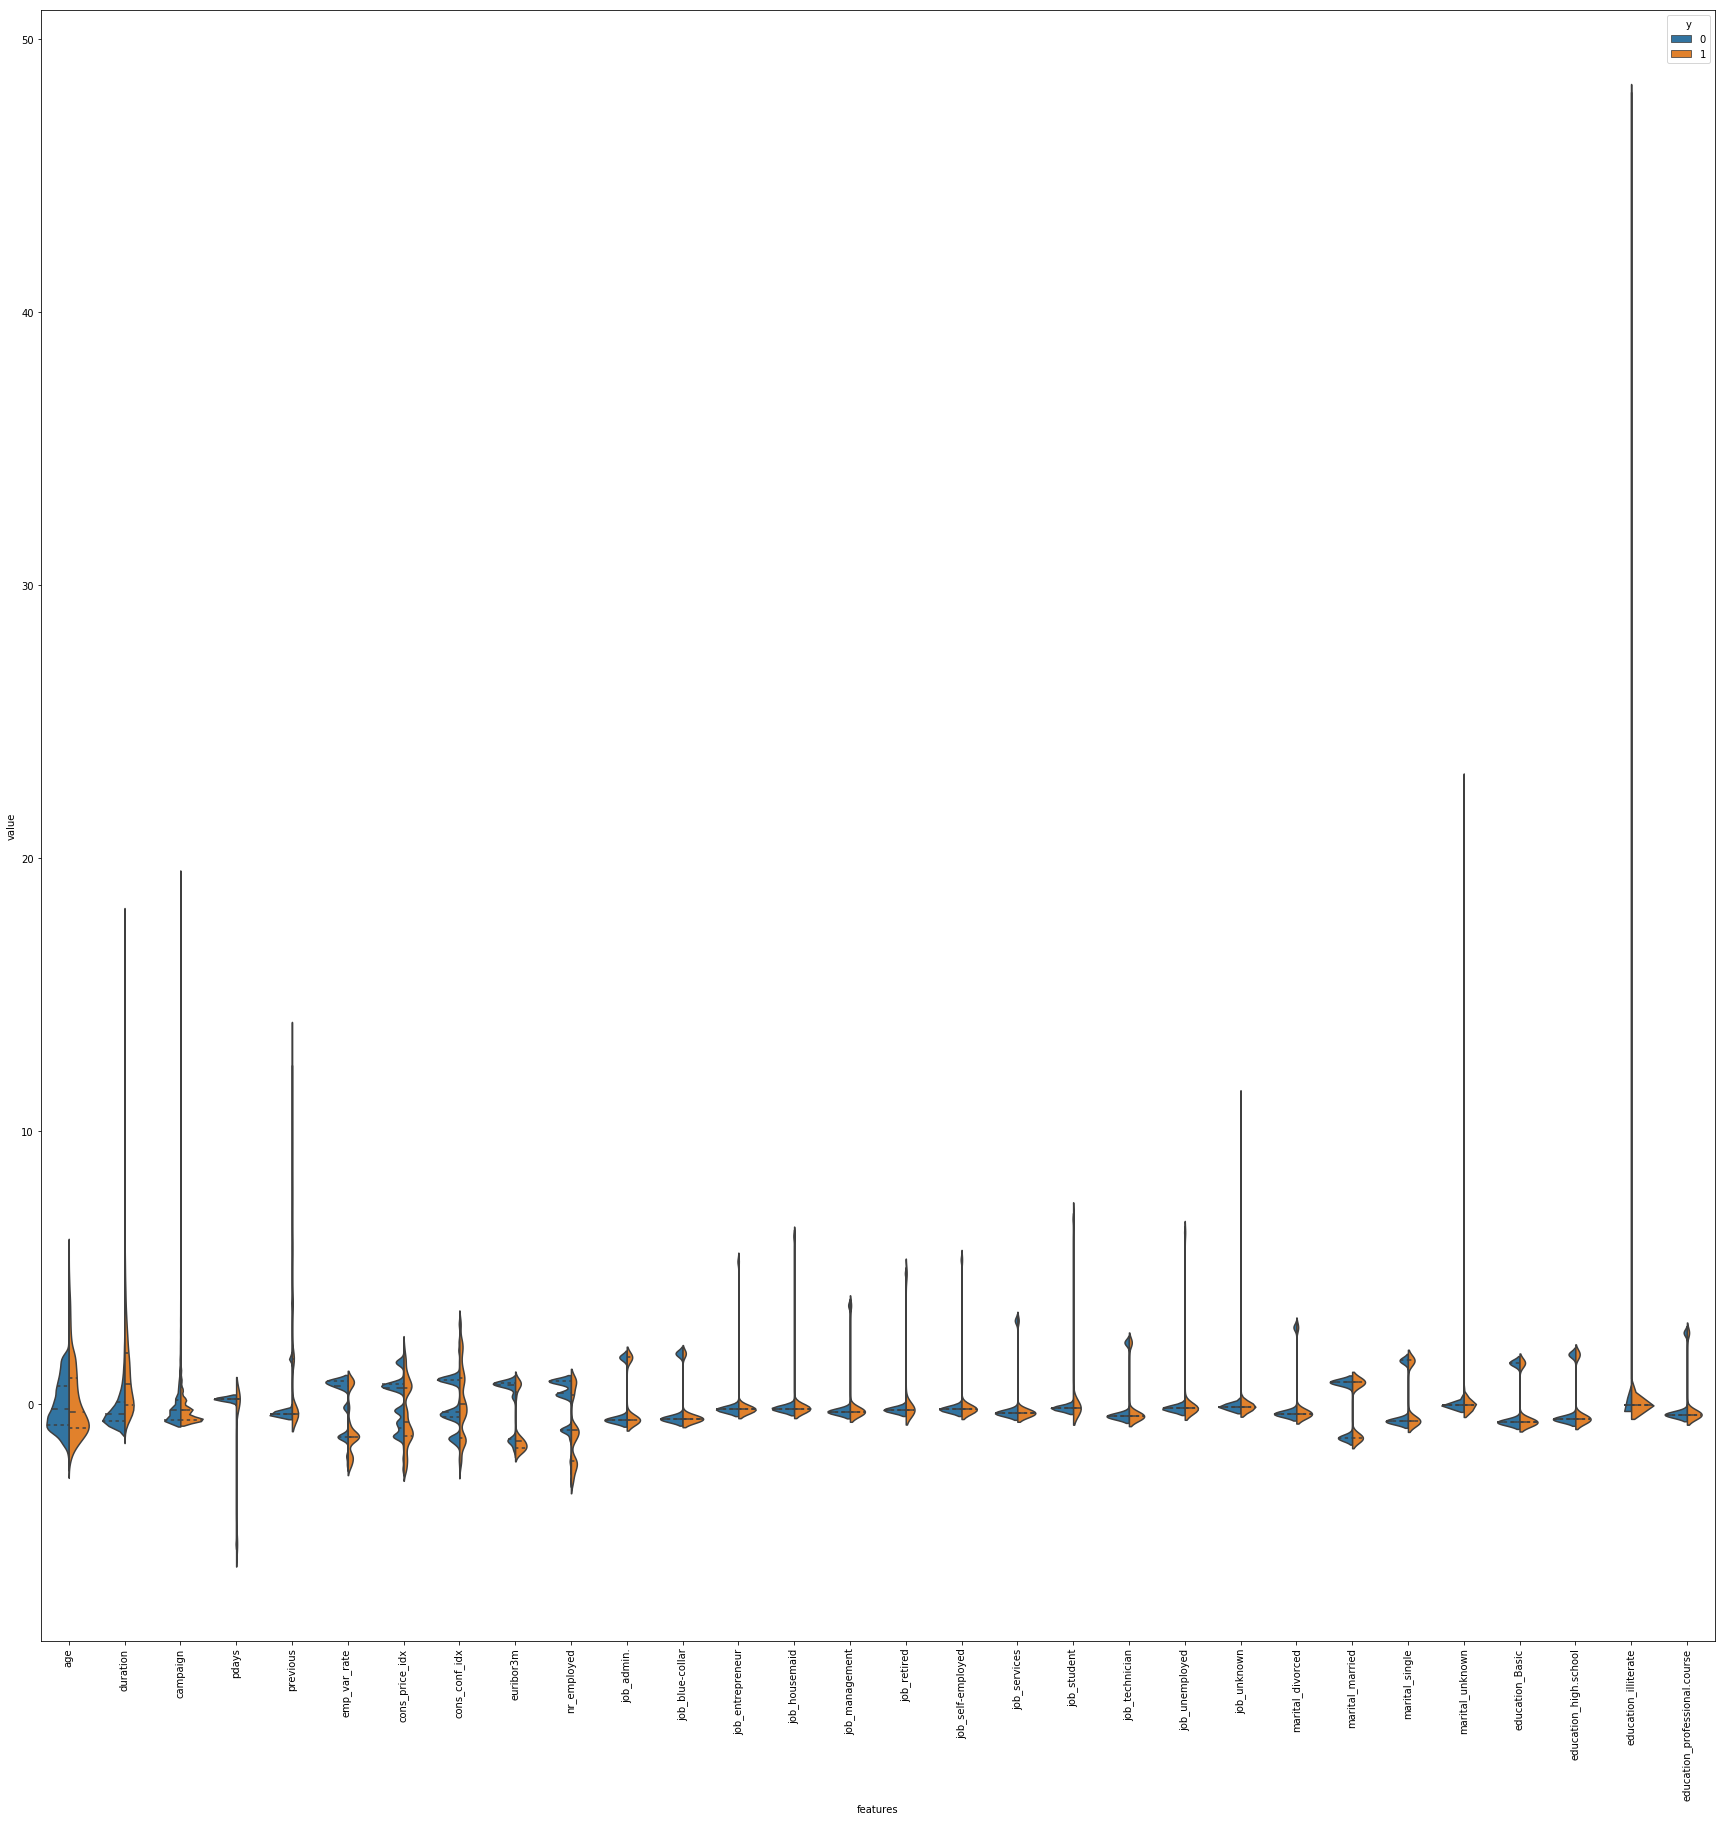

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
import time

plt.figure(figsize=(30,30))
sns.violinplot(x="features", y="value", hue="y", data=data_melt,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

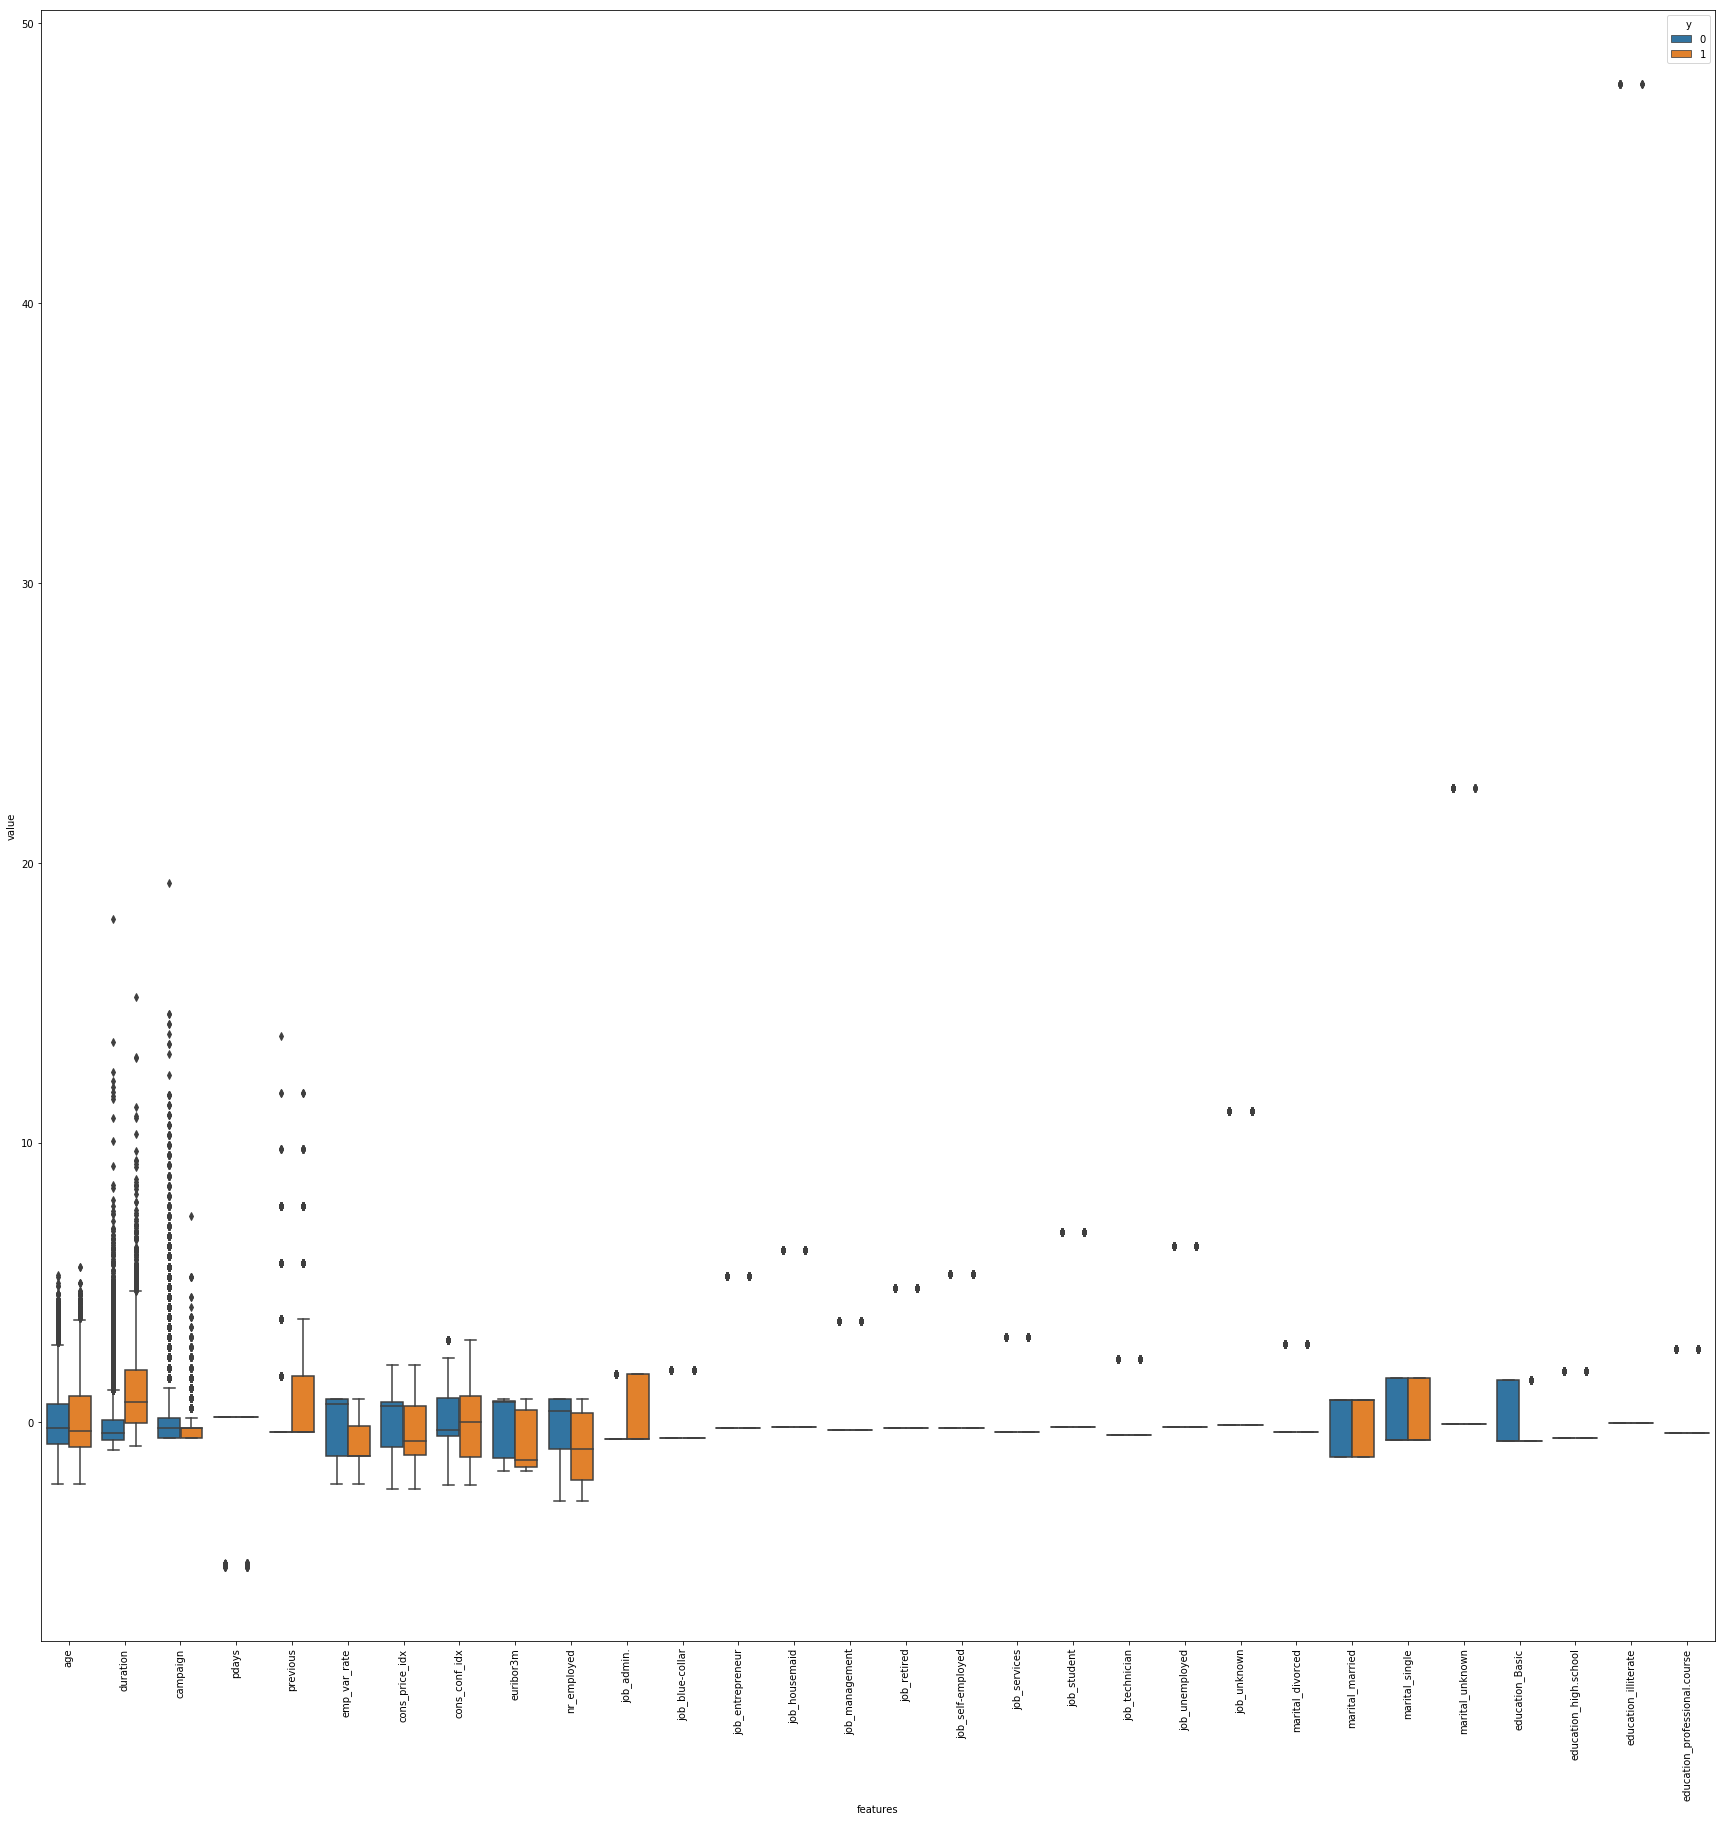

In [66]:
##alternative to violin plot, is a box plot - useful to see outliers
plt.figure(figsize=(30,30))
sns.boxplot(x="features", y="value", hue="y", data=data_melt)
plt.xticks(rotation=90)
plt.show()

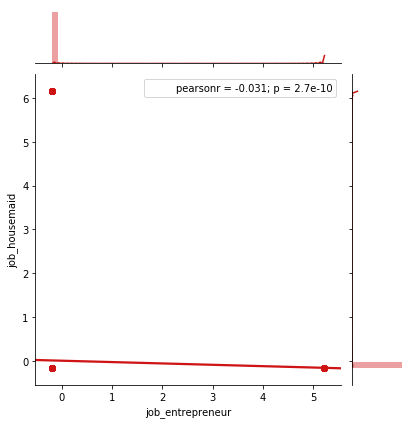

In [68]:
##comparing two features deeper - to see if there are correlated
sns.jointplot(X_std.loc[:,'job_entrepreneur'], 
              X_std.loc[:,'job_housemaid'],
              kind="regg", color="#ce1414")

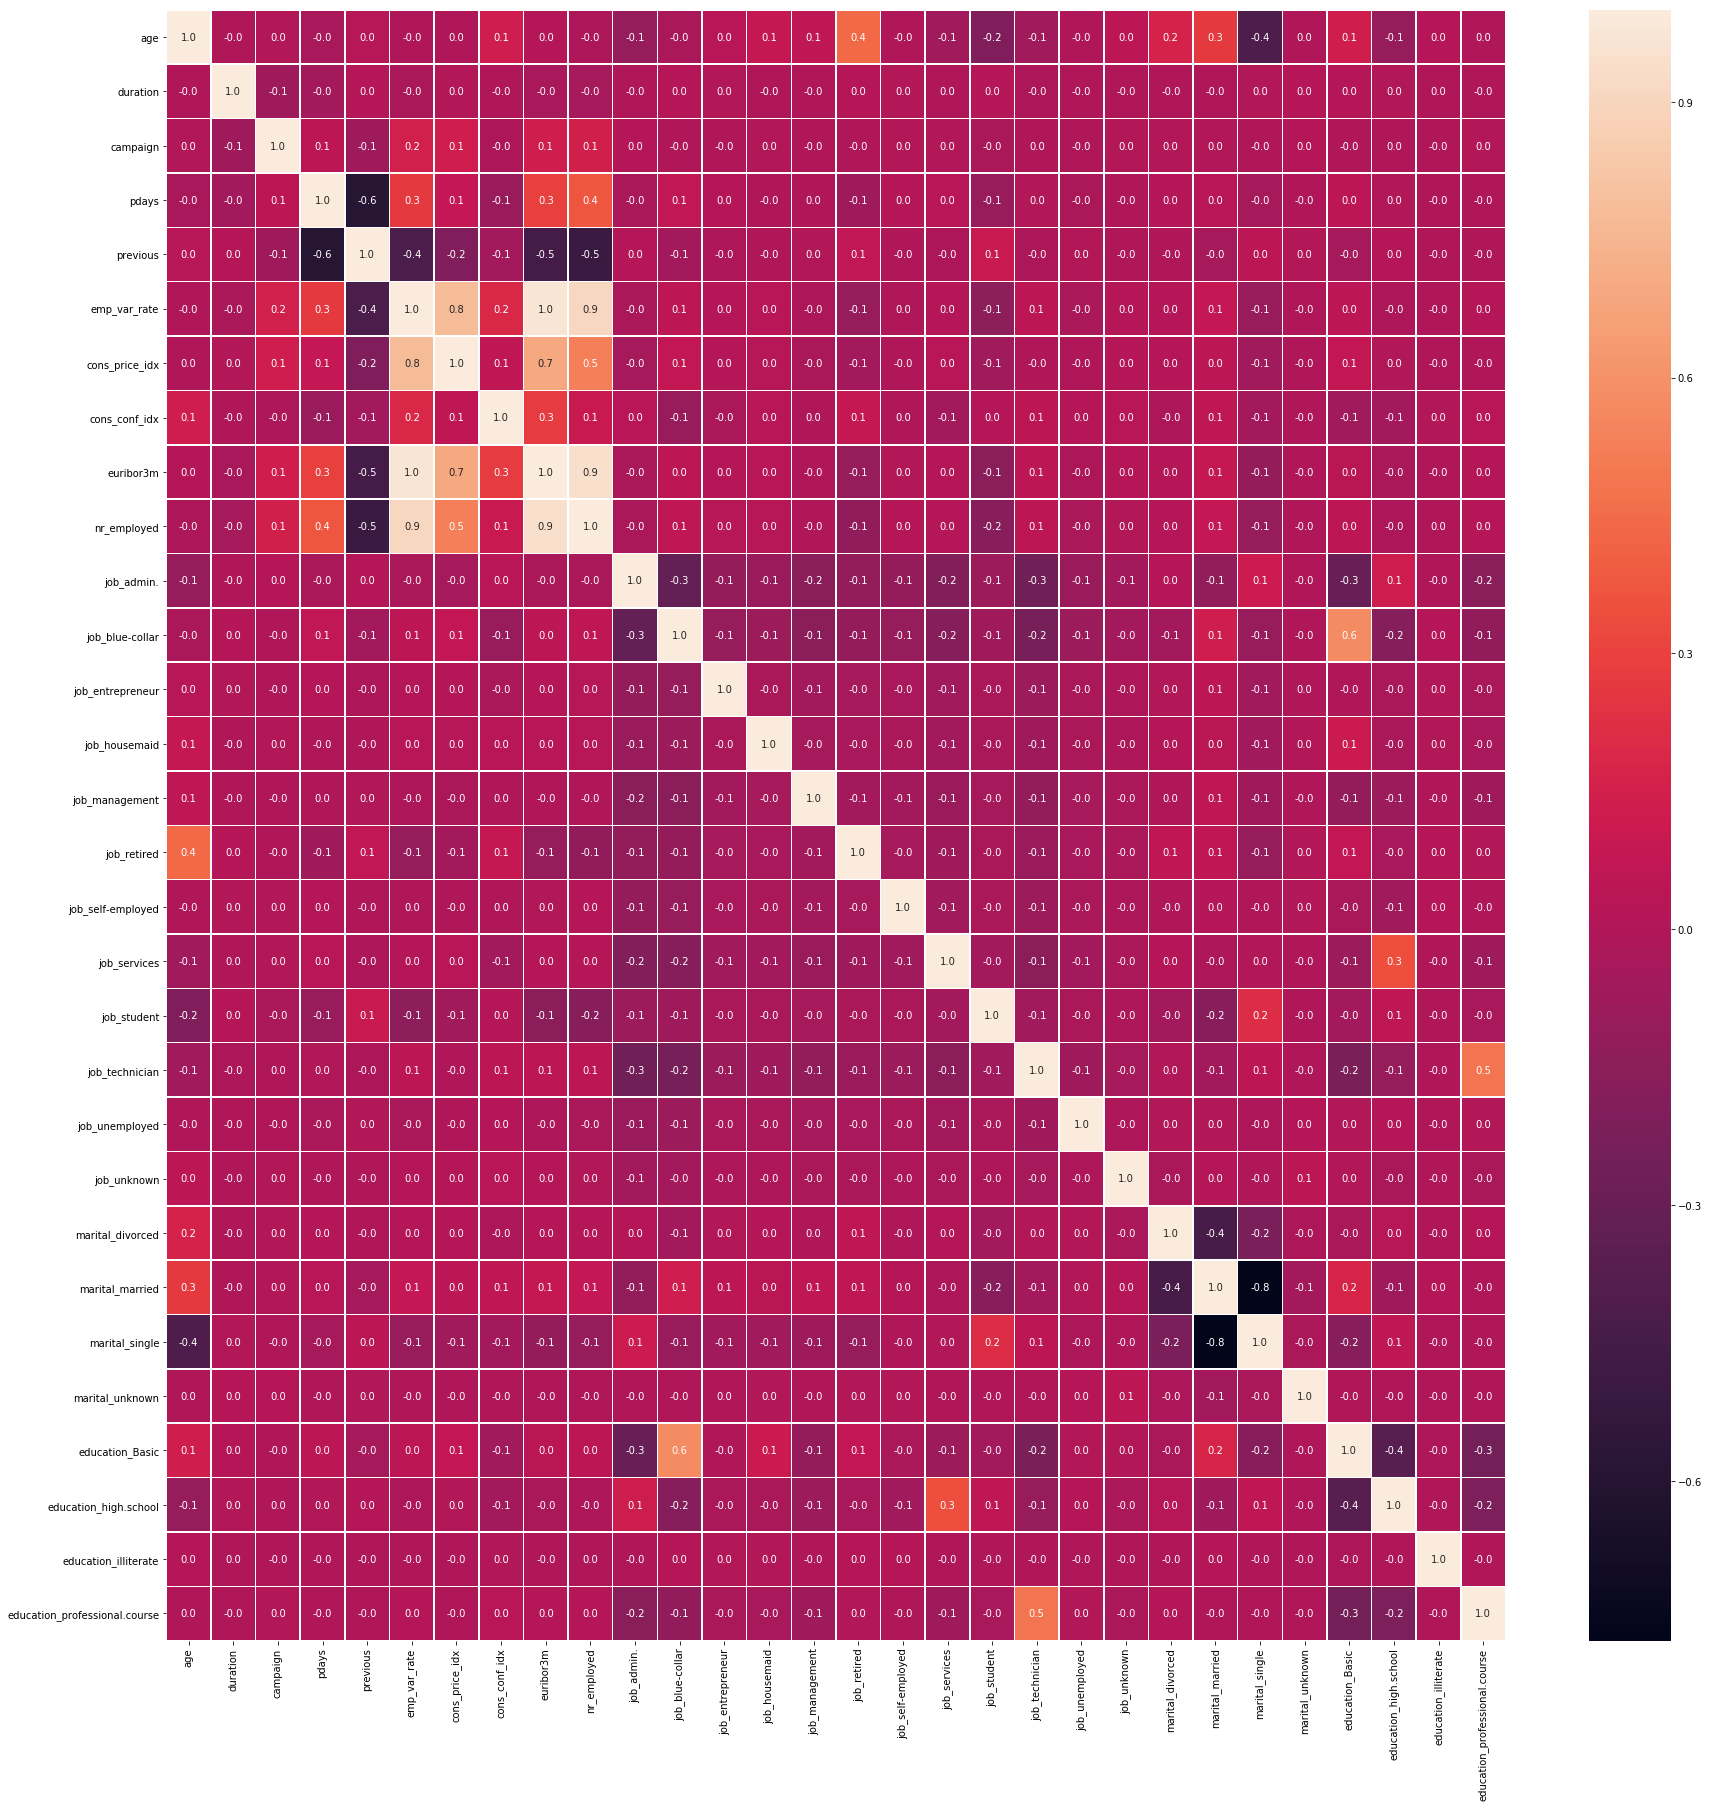

In [71]:
#correlation map - see correlation between all features
f,ax = plt.subplots(figsize=(30, 30))
sns.heatmap(X_std.iloc[:,0:30].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

KeyboardInterrupt: 

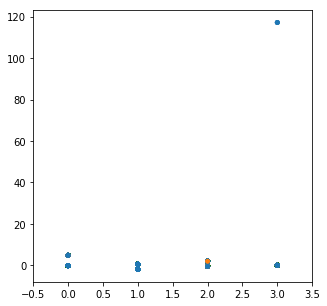

In [75]:
##swarm plot: are able to see the variations much clearly - can see if the two classes are seperate for the feature
##note, this plot take a while so use less features
data_5 = pd.concat([y, X_std.iloc[:,31:35]],axis=1)
data_melt_5 = pd.melt(data_5,id_vars="y",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(5, 5))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="y", data=data_melt_5)
toc = time.time()
plt.xticks(rotation=90)
print("swarm plot time: ", toc-tic ," s")